# 과제 1: 데이터 알아보기

## 1-1. 데이터 로드
AB_NYC_2019.csv 데이터 파일을 데이터 프레임 형태로 로드하여 df 변수에 저장합니다.

In [169]:
import pandas as pd
import seaborn as sns

In [183]:
df = pd.read_csv('./AB_NYC_2019.csv')

## 1-2. 데이터 탐색 및 전처리
- 로드한 데이터 일부를 살펴보고, 각 컬럼별 통계값을 뽑습니다.
- 결측치가 있다면 적절한 방법으로 처리합니다.

결측치 데이터가 있는지 확인함.  
isnull을 통해 확인해본 결과 null 값은 없는 것으로 보임.

In [191]:
df.dropna(inplace=True)
df.isna().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

데이터프레임의 5개 출력

In [195]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [166]:
# price 가 0인 부분이 있는데... 일단 0을 제외하는 아래 코드는 주석처리하기로 함. -> price 0 인 데이터 포함
df[df['price']==0].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


In [167]:
print(df.describe(include='all')) # 숫자형, 문자형 모두 보기 include = 'all'

                  id                 name       host_id host_name  \
count   3.882100e+04                38821  3.882100e+04     38821   
unique           NaN                38253           NaN      9885   
top              NaN  Home away from home           NaN   Michael   
freq             NaN                   12           NaN       335   
mean    1.810081e+07                  NaN  6.424582e+07       NaN   
std     1.069372e+07                  NaN  7.589752e+07       NaN   
min     2.539000e+03                  NaN  2.438000e+03       NaN   
25%     8.721444e+06                  NaN  7.029525e+06       NaN   
50%     1.887286e+07                  NaN  2.837092e+07       NaN   
75%     2.756746e+07                  NaN  1.018905e+08       NaN   
max     3.645581e+07                  NaN  2.738417e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                38821         38821  38821.000000  38821.000000   
unique                   5 

## 1-3. 기술 통계 및 시각화
- 가격 (price) 컬럼에 대한 분포 파악을 위해, 기술 통계값을 뽑고 및 시각화 도구를 사용하여 그림을 그립니다.

In [168]:
price_mean = df['price'].mean()
price_std = df['price'].std()
price_median = df['price'].median()
price_mode = df['price'].mode()
price_min = df['price'].min()
price_max = df['price'].max()


print(f'mean : {price_mean}')
print(f'median : {price_median}')
print(f'std : {price_std}')
print(f'mode : {price_mode}')
print(f'min : {price_min}')
print(f'max : {price_max}')
print()
print(df['price'].describe(include='all'))


mean : 142.33252621004095
median : 101.0
std : 196.9947559183469
mode : 0    150
Name: price, dtype: int64
min : 0
max : 10000

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64


In [170]:
len(df['price'])

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


단순히 시각화하면 아래와 같이 할 수 있음. 그러나 보기에 쉽지 않음.

<Axes: xlabel='price', ylabel='Count'>

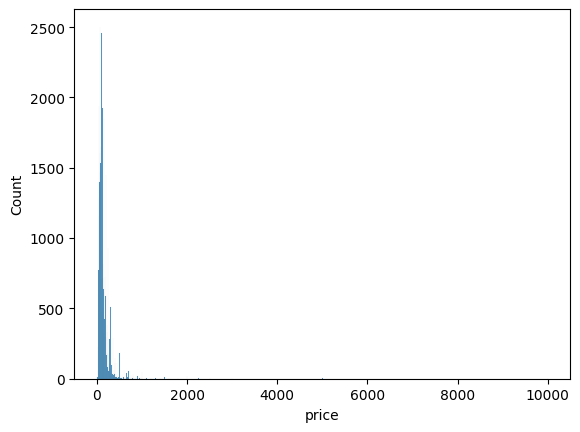

In [172]:
sns.histplot(data=df, x='price')

<Axes: >

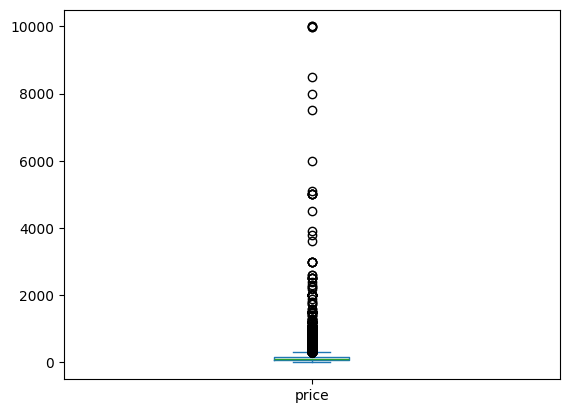

In [171]:
df['price'].plot(kind='box')

위의 시각화는 보기에 불편하여 아래의 시각화를 제시함.  
1-6. 자유해석에서도 시각화하지만 여기서 미리 시각화함.  
아래는 neighbourhood_group 별 방의 종류(room_type)별 가격을 나타냄

Text(0.5, 1.0, 'expensive area?')

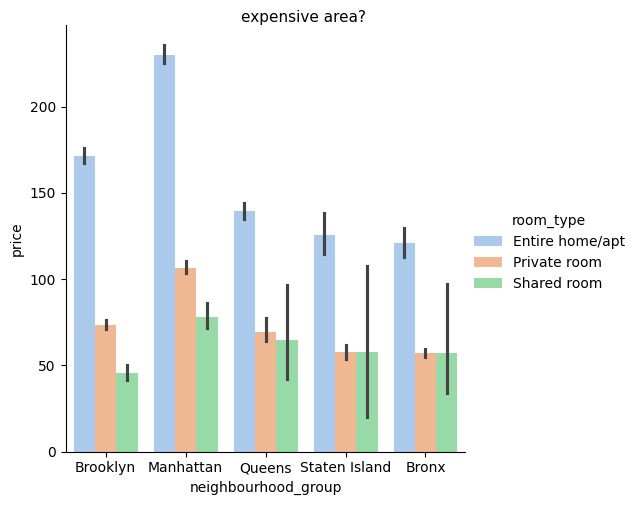

In [173]:
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type', hue_order=['Entire home/apt', 'Private room', 'Shared room'],palette='pastel')
fig2.fig.suptitle('expensive area?',fontsize=11,y=1.0)

## 1-4. 기술 통계 및 시각화
- 가격과 리뷰 수(number of reviews) 간의 관계를 살펴보기 위해, 관련된 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그립니다.

In [175]:
print(df['number_of_reviews'].describe(include='all'))

count    38821.000000
mean        29.290255
std         48.182900
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64


데이터 속성들간 상관계수를 계산한 후에 히트맵으로 시각화함.

In [214]:
corr_matrix = df.drop(['id', 'latitude','longitude', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'],axis=1).corr()

<Axes: >

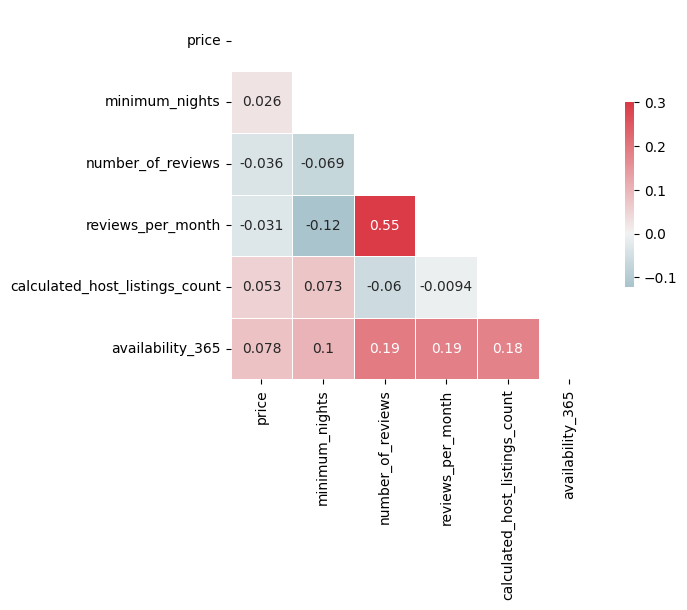

In [215]:
import numpy as np
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

가격(price) 리뷰 수(number_of_reviews) 간의 피어슨 상관계수는 -0.036임을 확인할 수 있음.  
위의 상관계수 계산 결과값으로는 관계성이 높다고는 판단할 수 없음.  

x 축을 리뷰 수, y 축을 가격으로 하여 산점도 출력해봄.

<Axes: xlabel='number_of_reviews', ylabel='price'>

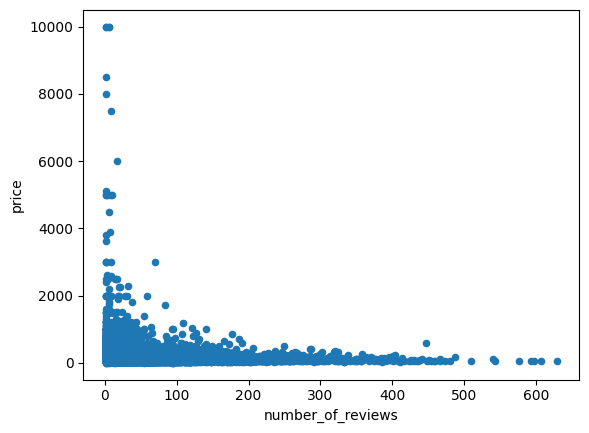

In [176]:
df.plot(x='number_of_reviews',y='price', kind='scatter')

## 1-5. 기술 통계 및 시각화
- neighborhood group과 가격의 관계를 알아보기 위해, 그룹별 가격의 분포에 대한 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그려봅니다.

In [178]:
# 그룹별로 묶은 데이터프레임
df_g = df.groupby(['neighbourhood_group'])
# 그룹별 가격의 분포에 대한 기술 통계값 출력
df_g['price'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,875.0,79.558857,63.999121,0.0,45.0,65.0,95.0,800.0
Brooklyn,16439.0,121.463289,169.887979,0.0,60.0,94.0,150.0,10000.0
Manhattan,16621.0,180.071596,226.474061,10.0,90.0,140.0,200.0,9999.0
Queens,4572.0,95.783683,168.395210,10.0,50.0,72.0,109.0,10000.0
Staten Island,314.0,89.964968,65.864044,13.0,50.0,75.0,105.0,625.0


x 축을 지역그룹, y 축을 가격으로 하여 산점도를 출력해봄.  
다른 그룹보다 Staten Island, Bronx 의 최고 가격이 낮음. 위의 통계 값에서도 확인 가능.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

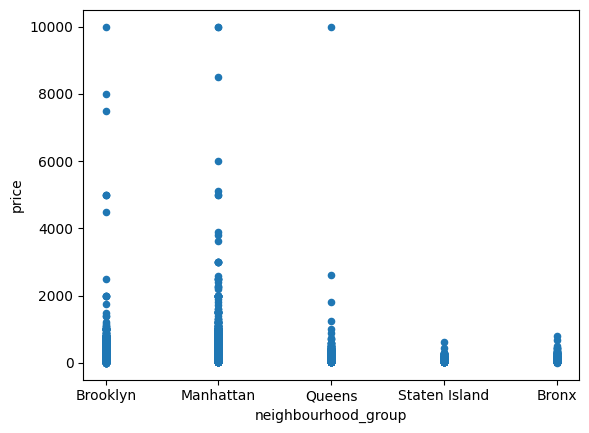

In [177]:
df.plot(x='neighbourhood_group',y='price', kind='scatter')

neighbourhood group별 방 가격들의 평균을 비교해보기 위해 neighbourhood group 별 가격 평균 비교함.  
가격 평균은 Manhatten이 가장 높게 나옴.  

<Axes: xlabel='neighbourhood_group'>

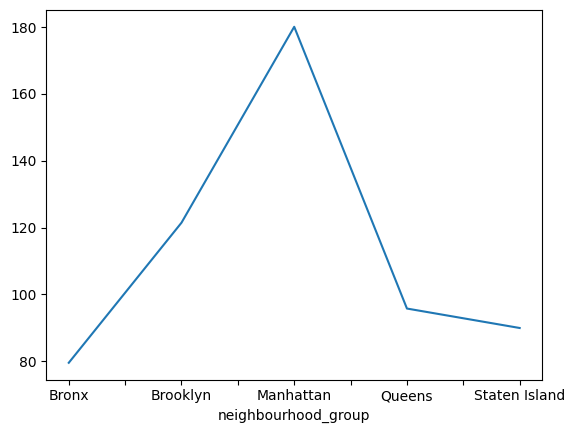

In [179]:
df_g['price'].mean().plot()

## 1-6. 그룹별 특징 자유 분석

- neighborhood group 에 따라 어떤 특징이 있는지 자유롭게 분석하고 결과의 의미를 해석하여 제시합니다.

#### 해석 1. neighbourhood_group에 따른 위도, 경도로 산점도 시각화했을 때의 의미

먼저 neighbourhood group에 따라 longtitude와 latitude 정보를 이용하여 산점도를 시각화 해봄.  
neighbourhood group은 색으로 구분됨.  
가격에 따라 점의 크기가 다르게 함.  

<Axes: xlabel='longitude', ylabel='latitude'>

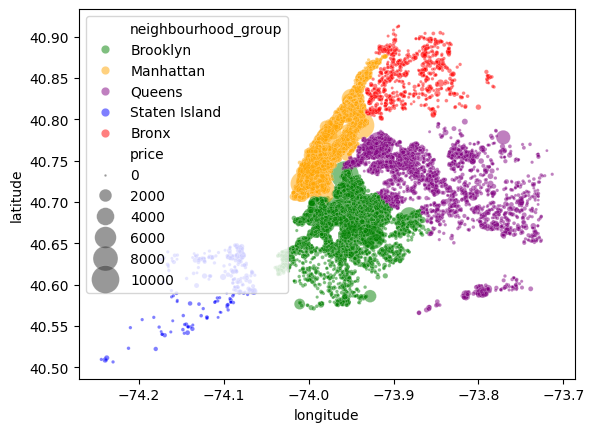

In [181]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', size="price",
            sizes=(3, 400), palette=['green','orange','purple','blue','red'], alpha=0.5)

위의 위도와 경도를 x, y축으로 하여 산점도를 그리면 각 지역 그룹의 위치와 가격 정보를 한눈에 볼 수 있었음.  
산점도에서 보이는 각 neghbourhood_group별 점들이 이루는 모양을  
실제 뉴욕의 지도 이미지와 비교해보니 구역 구분이 일치함.  
그러나 데이터가 많아서 가격을 보기에는 불편함이 있음.  

----

### 해석 2. availability_365에 대한 해석과 의미

availability_365 = 0은 아래 두 가지로 해석해볼 수 있음.
* 1. 목록이 제거되었을 때
* 2. 방이 예약되었을 때

2019년도 기준 데이터셋이므로  
데이터셋에서 1에 해당 되는 데이터를 제거하기 위해 2019년에 적어도 하나의 리뷰가 있을 때 availability_365가 0인 데이터들을 선택하여 남김.  
review_year이 2019년이 아니면서 availability_365이 0인 가용성의 데이터는 제외함.  

In [180]:
df_preproc = df.copy()

df_preproc['last_review'] = pd.to_datetime(df_preproc['last_review'])
df_preproc['review_year'] = df_preproc['last_review'].apply(lambda last_review:last_review.year)
df_preproc['review_year'] = df_preproc['review_year'].fillna(0)
df_preproc['review_year'] = df_preproc['review_year'].astype(int)
df_preproc = pd.concat([df_preproc[(df_preproc['availability_365']==0) & (df_preproc['review_year']==2019)], df_preproc[df_preproc['availability_365']>0]])

reviews_per_month의 NA 데이터는 last_reviews 데이터가 없기 때문에 reviews가 전혀 없음을 시사함.  
따라서 NA 데이터를 0으로 채움.  
reviews_per_month 열의 NA 데이터 0으로 채우기  

In [182]:
df_preproc['reviews_per_month'] = df_preproc['reviews_per_month'].fillna(0)

데이터 처리 전

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

데이터 처리 후

In [ ]:
df_preproc.info()
df_preproc.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 29232 entries, 132 to 48852
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              29232 non-null  int64         
 1   name                            29232 non-null  object        
 2   host_id                         29232 non-null  int64         
 3   host_name                       29232 non-null  object        
 4   neighbourhood_group             29232 non-null  object        
 5   neighbourhood                   29232 non-null  object        
 6   latitude                        29232 non-null  float64       
 7   longitude                       29232 non-null  float64       
 8   room_type                       29232 non-null  object        
 9   price                           29232 non-null  int64         
 10  minimum_nights                  29232 non-null  int64         
 11  numbe

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_year
count,2.923200e+04,2.923200e+04,29232.000000,29232.000000,29232.000000,29232.000000,29232.000000,29232,29232.000000,29232.000000,29232.000000,29232.000000
mean,1.965147e+07,7.340679e+07,40.727409,-73.948611,146.946976,6.332683,36.267207,2019-03-22 14:51:40.492610816,1.743814,6.437876,152.572557,2018.779180
min,2.539000e+03,2.571000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,2011-04-25 00:00:00,0.010000,1.000000,0.000000,2011.000000
25%,9.955610e+06,7.359920e+06,40.687455,-73.982390,69.000000,1.000000,4.000000,2019-04-18 00:00:00,0.430000,1.000000,27.000000,2019.000000
50%,2.126505e+07,3.450221e+07,40.721520,-73.953470,106.000000,2.000000,15.000000,2019-06-13 00:00:00,1.140000,1.000000,128.000000,2019.000000
75%,2.966498e+07,1.286960e+08,40.762842,-73.930580,175.000000,4.000000,46.000000,2019-06-27 00:00:00,2.570000,3.000000,279.000000,2019.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,9999.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000,2019.000000
std,1.109368e+07,8.178932e+07,0.056345,0.050291,190.568903,18.812709,52.900438,NaN,1.771216,30.164413,128.576110,0.677863


처리 과정 후 누락 데이터 확인

In [188]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Text(0.5, 1.0, 'popular room?')

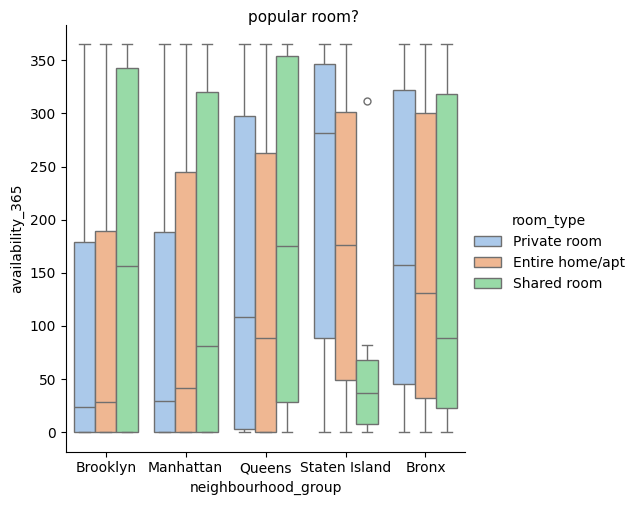

In [186]:
# Availability according to different room_type in different areas
fig = sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=df,palette='pastel')
fig.fig.suptitle('popular room?',fontsize=11,y=1.)

위에서 Staten Island의 Shared room이 인기 많아보임.

----

#### 해석 2. neighbourhood group별 룸 종류에 따른 가격 비교

<Axes: xlabel='neighbourhood_group', ylabel='price'>

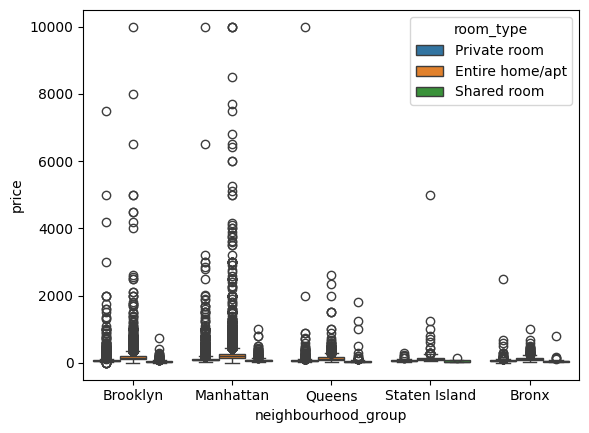

In [184]:
sns.boxplot(y='price', x='neighbourhood_group', hue='room_type', data=df)

outlier값으로 인해 box plot을 보기가 쉽지 않음.  
IQR 계산을 한 후에 이를 이용하여 outlier을 필터링함.

In [187]:
q1=df['price'].quantile(0.25)
q2=df['price'].quantile(0.5)
q3=df['price'].quantile(0.75)

iqr = q3 - q1
print(iqr)

filtered = df.query('(@q1 - 1.5 * @iqr) <= price <= (@q3 + 1.5 * @iqr)')

106.0


필터링을 거친 후, box plot으로 시각화함.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

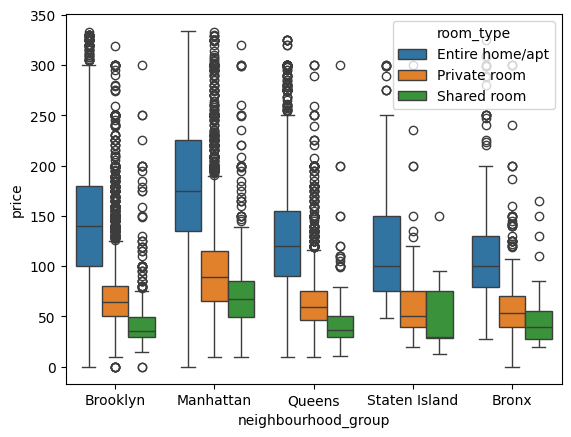

In [189]:
sns.boxplot(y='price', x='neighbourhood_group', hue='room_type', hue_order=['Entire home/apt', 'Private room', 'Shared room'], data=filtered)

IQR 값을 이용한 필터링을 거친 이후 시각화를 해보면 맨하탄의 평균 가격이 가장 높음.  
브루클린, 맨해튼, 퀸즈를 보면 Entire home/apt, Private room, Shared room 순의 비슷한 가격구조를 가짐.  

룸 종류별 가격에 대한 정보를 보다 더 파악하기 위해  
위의 박스 플롯뿐만 아니라 IQR 필터링을 거치 않은 데이터에 대해 바 플룻으로 시각화를 하여봄

Text(0.5, 1.0, 'expensive area?')

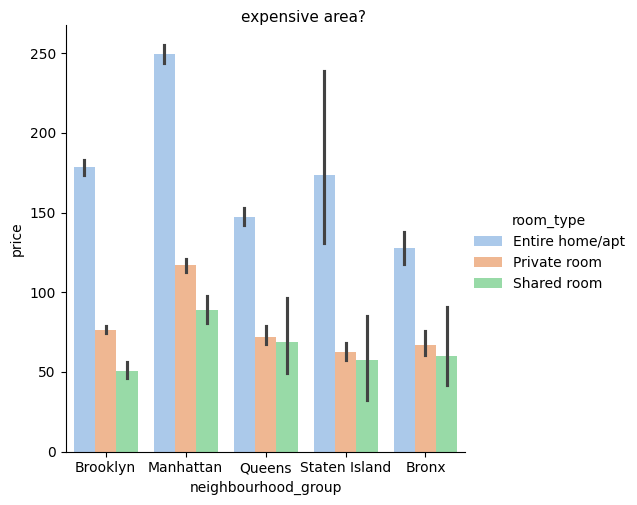

In [190]:
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type', hue_order=['Entire home/apt', 'Private room', 'Shared room'],palette='pastel')
fig2.fig.suptitle('expensive area?',fontsize=11,y=1.0)

위의 바플롯에서도 맨하탄이 대체적으로 가격이 다른 지역에 비해 더 높은 것을 볼 수 있음.  
위의 바플롯에서도 브루클린, 맨해튼, 퀸즈를 보면 Entire home/apt, Private room, Shared room 순의 비슷한 가격구조를 가진 것을 확인할 수 있음.

----

## 해석 3. 분포도 로그 스케일링

그룹별로 분포도를 그려봄.  
Queens, Manhattan, Brooklyn의 경우는 특히 심하게 치우친 Positively skewed 분포인 것을 알 수 있음.  

In [194]:
bronx_g = df[df['neighbourhood_group'] == 'Bronx'].copy()
stisland_g = df[df['neighbourhood_group'] == 'Staten Island'].copy()
queens_g = df[df['neighbourhood_group'] == 'Queens'].copy()
manhattan_g = df[df['neighbourhood_group'] == 'Manhattan'].copy()
brooklyn_g = df[df['neighbourhood_group'] == 'Brooklyn'].copy()

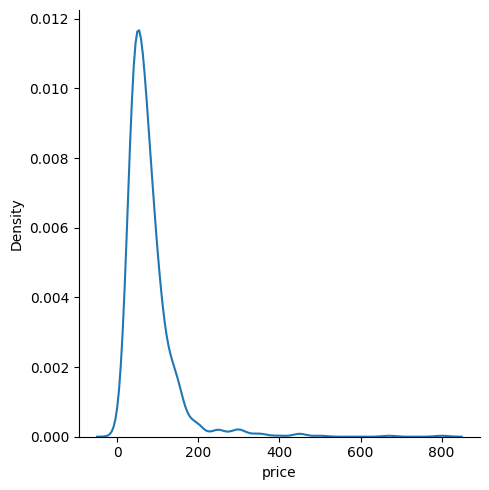

In [192]:
sns.displot(data=df[df['neighbourhood_group'] == 'Bronx'], x='price', kind='kde')

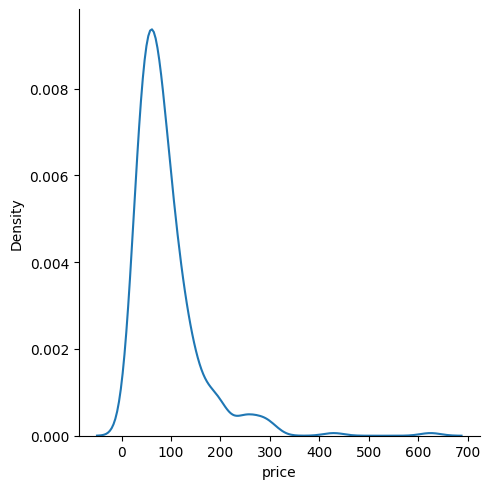

In [193]:
sns.displot(data=df[df['neighbourhood_group'] == 'Staten Island'], x='price', kind='kde')

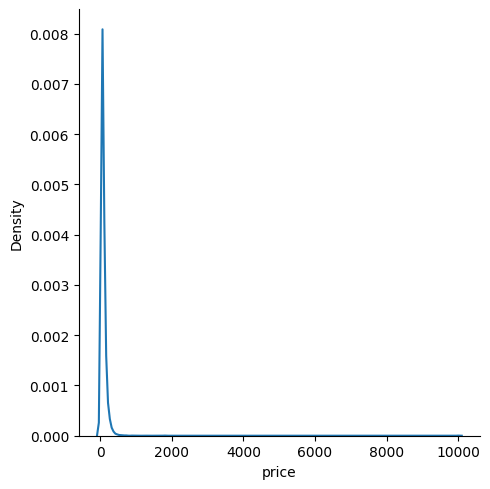

In [ ]:
sns.displot(data=df[df['neighbourhood_group'] == 'Queens'], x='price', kind='kde')

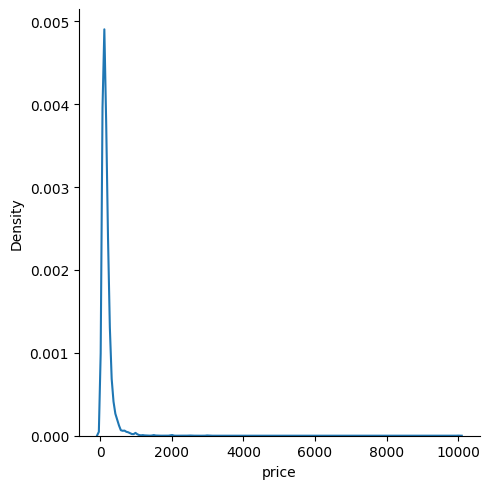

In [198]:
sns.displot(data=df[df['neighbourhood_group'] == 'Manhattan'], x='price', kind='kde')

<Axes: xlabel='price', ylabel='Count'>

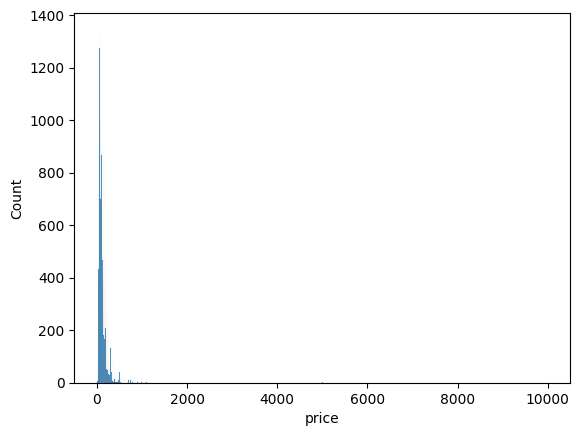

In [197]:
#sns.displot(data=df[df['neighbourhood_group'] == 'Brooklyn'], x='price', kind='kde')
sns.histplot(data=df[df['neighbourhood_group'] == 'Brooklyn'], x='price')

분포에 log를 취하여 정규분포 모양에 좀 더 가까워지도록 함.  

In [ ]:
import numpy as np


#0에는 로그를 취하면 -inf 가 되므로 0으로 Nan으로 바꾼 후 drop시키는 코드
bronx_g['price'] = bronx_g['price'].replace(0, np.nan)
stisland_g['price'] = stisland_g['price'].replace(0, np.nan)
queens_g['price'] = queens_g['price'].replace(0, np.nan)
manhattan_g['price'] = manhattan_g['price'].replace(0, np.nan)
brooklyn_g['price'] = brooklyn_g['price'].replace(0, np.nan)
bronx_g.dropna(axis=0, how='any', subset=['price'], inplace=True)
stisland_g.dropna(axis=0, how='any', subset=['price'], inplace=True)
queens_g.dropna(axis=0, how='any', subset=['price'], inplace=True)
manhattan_g.dropna(axis=0, how='any', subset=['price'], inplace=True)
brooklyn_g.dropna(axis=0, how='any', subset=['price'], inplace=True)


'''
#0에는 로그를 취하면 -inf 가 되므로 0을 작은 값인 0.001로 대체하는 코드
bronx_g['price'] = bronx_g['price'].replace(0, 0.001)
stisland_g['price'] = stisland_g['price'].replace(0, 0.001)
queens_g['price'] = queens_g['price'].replace(0, 0.001)
manhattan_g['price'] = manhattan_g['price'].replace(0, 0.001)
brooklyn_g['price'] = brooklyn_g['price'].replace(0, 0.001)
'''

bronx_g['log_price'] = np.log(bronx_g['price'])
stisland_g['log_price'] = np.log(stisland_g['price'])
queens_g['log_price'] = np.log(queens_g['price'])
manhattan_g['log_price'] = np.log(manhattan_g['price'])
brooklyn_g['log_price'] = np.log(brooklyn_g['price'])

<Axes: xlabel='log_price', ylabel='Count'>

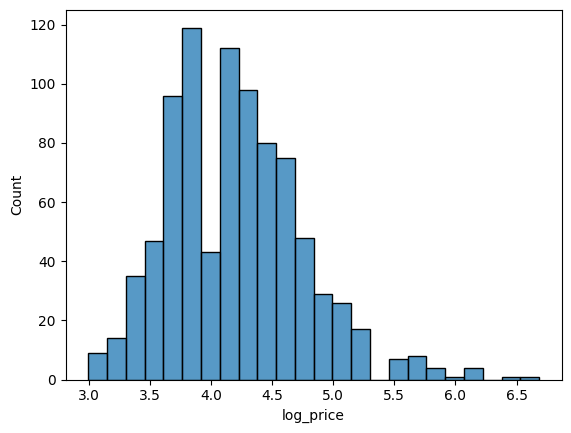

In [ ]:
sns.histplot(data=bronx_g, x='log_price')

In [199]:
sns.histplot(data=stisland_g, x='log_price')

ValueError: Could not interpret value `log_price` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='log_price', ylabel='Count'>

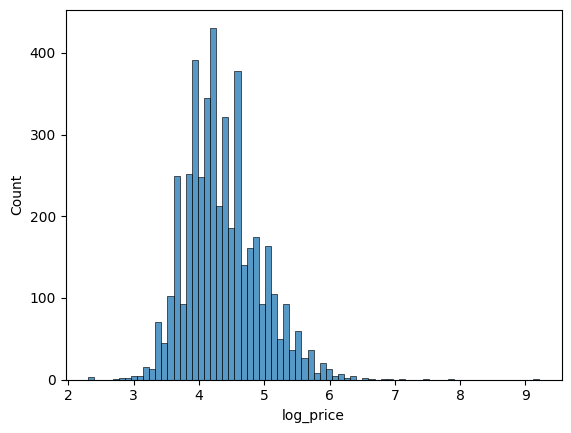

In [ ]:
sns.histplot(data=queens_g, x='log_price')

<Axes: xlabel='log_price', ylabel='Count'>

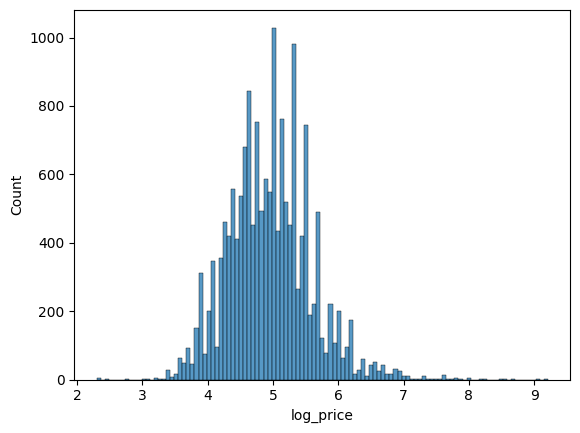

In [ ]:
sns.histplot(data=manhattan_g, x='log_price')

<Axes: xlabel='log_price', ylabel='Count'>

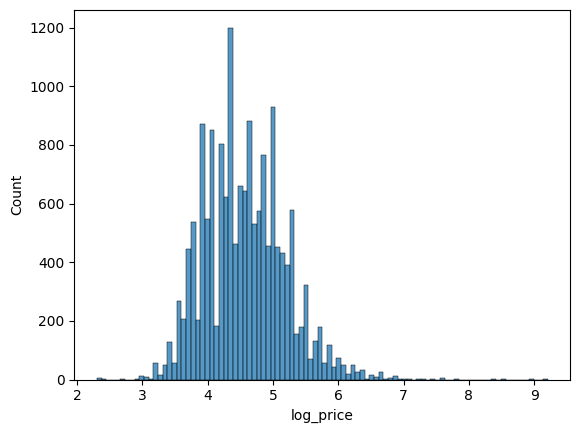

In [ ]:
sns.histplot(data=brooklyn_g, x='log_price')

----------